In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
from keras.layers import *
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import *

In [6]:
!wget https://drive.google.com/file/d/1FOE4jNTi-bjE8u6Ks6hGO8mOBK9bJFrM/view?usp=sharing

--2020-10-02 09:59:45--  https://drive.google.com/file/d/1FOE4jNTi-bjE8u6Ks6hGO8mOBK9bJFrM/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 74.125.128.138, 74.125.128.139, 74.125.128.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.128.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view?usp=sharing’

view?usp=sharing        [ <=>                ]  68.81K  --.-KB/s    in 0.08s   

2020-10-02 09:59:45 (862 KB/s) - ‘view?usp=sharing’ saved [70463]



In [7]:
!gdown --id 1FOE4jNTi-bjE8u6Ks6hGO8mOBK9bJFrM

Downloading...
From: https://drive.google.com/uc?id=1FOE4jNTi-bjE8u6Ks6hGO8mOBK9bJFrM
To: /content/catdog.zip
87.1MB [00:03, 28.3MB/s]


In [8]:
from zipfile import ZipFile
filename="catdog.zip"
with ZipFile(filename,'r') as zip:
  zip.extractall()
  print("done") 

done


In [9]:
list_of_animals=os.listdir("training/")
print(list_of_animals)

['cats', 'dogs']


In [11]:
val_gen = ImageDataGenerator(rescale=1.0/255)
val_generator = val_gen.flow_from_directory(
    "test/",
    target_size = (100,100),
    batch_size = 16,
    class_mode = 'binary'
)


Found 305 images belonging to 2 classes.


In [12]:
train_gen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_gen.flow_from_directory(
    "training/",
    target_size = (100,100),
    batch_size=16,
    class_mode = 'binary'
)

Found 3536 images belonging to 2 classes.


In [13]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, load_model

In [15]:
classifier = Sequential()

classifier.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(100, 100, 3), activation='relu'))
classifier.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))

# Add pooling layer
classifier.add(MaxPooling2D(pool_size=(2,2)))

# Add 2 more convolution layers
classifier.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
classifier.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))

# Add max pooling layer
classifier.add(MaxPooling2D(pool_size=(2,2)))

# Add 2 more convolution layers
classifier.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
classifier.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))

# Add max pooling layer
classifier.add(MaxPooling2D(pool_size=(2,2)))

# Add global average pooling layer
classifier.add(GlobalAveragePooling2D())
classifier.add(Dense(1, activation='sigmoid')) # 2 because we have cat and dog classes

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 32)        9

In [18]:
history = classifier.fit_generator(
    train_generator,
    steps_per_epoch=221,
    epochs=8,
    validation_data=val_generator,
    validation_steps=20
    )

Epoch 1/8
221/221 [==============================] - 10s 43ms/step - loss: 0.4572 - accuracy: 0.7890 - val_loss: 0.4965 - val_accuracy: 0.7672
Epoch 2/8
221/221 [==============================] - 10s 44ms/step - loss: 0.4291 - accuracy: 0.8035 - val_loss: 0.5202 - val_accuracy: 0.7508
Epoch 3/8
221/221 [==============================] - 10s 43ms/step - loss: 0.4164 - accuracy: 0.8100 - val_loss: 0.5061 - val_accuracy: 0.7574
Epoch 4/8
221/221 [==============================] - 9s 42ms/step - loss: 0.4017 - accuracy: 0.8207 - val_loss: 0.4894 - val_accuracy: 0.7869
Epoch 5/8
221/221 [==============================] - 9s 42ms/step - loss: 0.3731 - accuracy: 0.8357 - val_loss: 0.5045 - val_accuracy: 0.7836
Epoch 6/8
221/221 [==============================] - 9s 43ms/step - loss: 0.3487 - accuracy: 0.8473 - val_loss: 0.5328 - val_accuracy: 0.8066
Epoch 7/8
221/221 [==============================] - 9s 43ms/step - loss: 0.3326 - accuracy: 0.8566 - val_loss: 0.6377 - val_accuracy: 0.7607
Epo

In [ ]:
classifier.save('catdog.h5')

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss= history.history['val_loss']

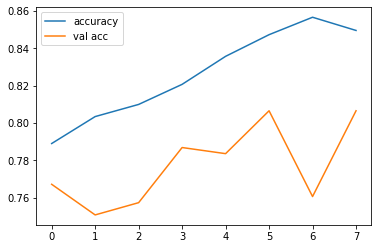

In [22]:
plt.plot(acc,label="accuracy")
plt.plot(val_acc,label="val acc")
plt.legend()
plt.show()

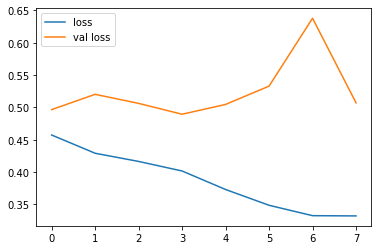

In [23]:
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val loss')
plt.legend()
plt.show()

(100, 100, 3)

(1, 100, 100, 3)


In [ ]:
classifier.predict(img)

array([[0.42110848]], dtype=float32)

In [ ]:
model.predict(img)

array([[0.5941216]], dtype=float32)

Unknown TensorFlow version: ()
Currently selected TF version: 2.x
Available versions:
 * 1.x
 * 2.x


In [ ]:
import keras 
print(keras.__version__)

2.4.3


In [ ]:
import tensorflow as tf 
print(tf.__version__)

2.3.0


In [ ]:
from keras.models import load_model

In [ ]:
car=load_model('keras_model.h5')

In [ ]:
car.compile()

In [ ]:
car